# Comparing Frequencies Across Time Intervals and Categories

## Importing Packages

In [13]:
import pandas as pd
import numpy as np
import regex as re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import random
import seaborn as sns
from matplotlib import pyplot as plt

## Downloading and Initializing **Stopwords**

In [14]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Defining Keywords

In [15]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
dict1 = dict(zip([0, 1, 2, 3], keywords))

## Reading Dataset

In [16]:
df = pd.read_csv("un-general-debates-blueprint.csv")

## About the Dataset

### Dataset Information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


### Dataset Statistics

In [18]:
df.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


## Defining Methods for Processing

In [19]:
def tokenize(text):
	return re.findall(r'[\w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
	return [t for t in tokens if t not in stopwords]

def prepare(text, pipeline):
	tokens = text
	for transform in pipeline:
		tokens = transform(tokens)
	return tokens
  
def count_keywords(tokens, keywords):
	tokens = [t for t in tokens if t in keywords]
	counter = Counter(tokens)
	return [counter.get(k, 0) for k in keywords]

## Defining Tokenizing Pipeline

In [20]:
pipeline = [str.lower, tokenize, remove_stop]

## Data Pre-Processing

In [21]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)

## Evaluating Frequency Matrix from Tokens

In [22]:
freq_matrix = df['tokens'].apply(count_keywords, keywords=keywords)
df2 = pd.DataFrame.from_dict(dict(zip(freq_matrix.index, freq_matrix.values))).T

## Evaluating Ratio of the choosen keywords from the rest of tokens

In [23]:
df3 = df2.rename(columns=dict1) 
df3['year'] = df['year']
freq_df = df3.groupby(by='year').sum()
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)

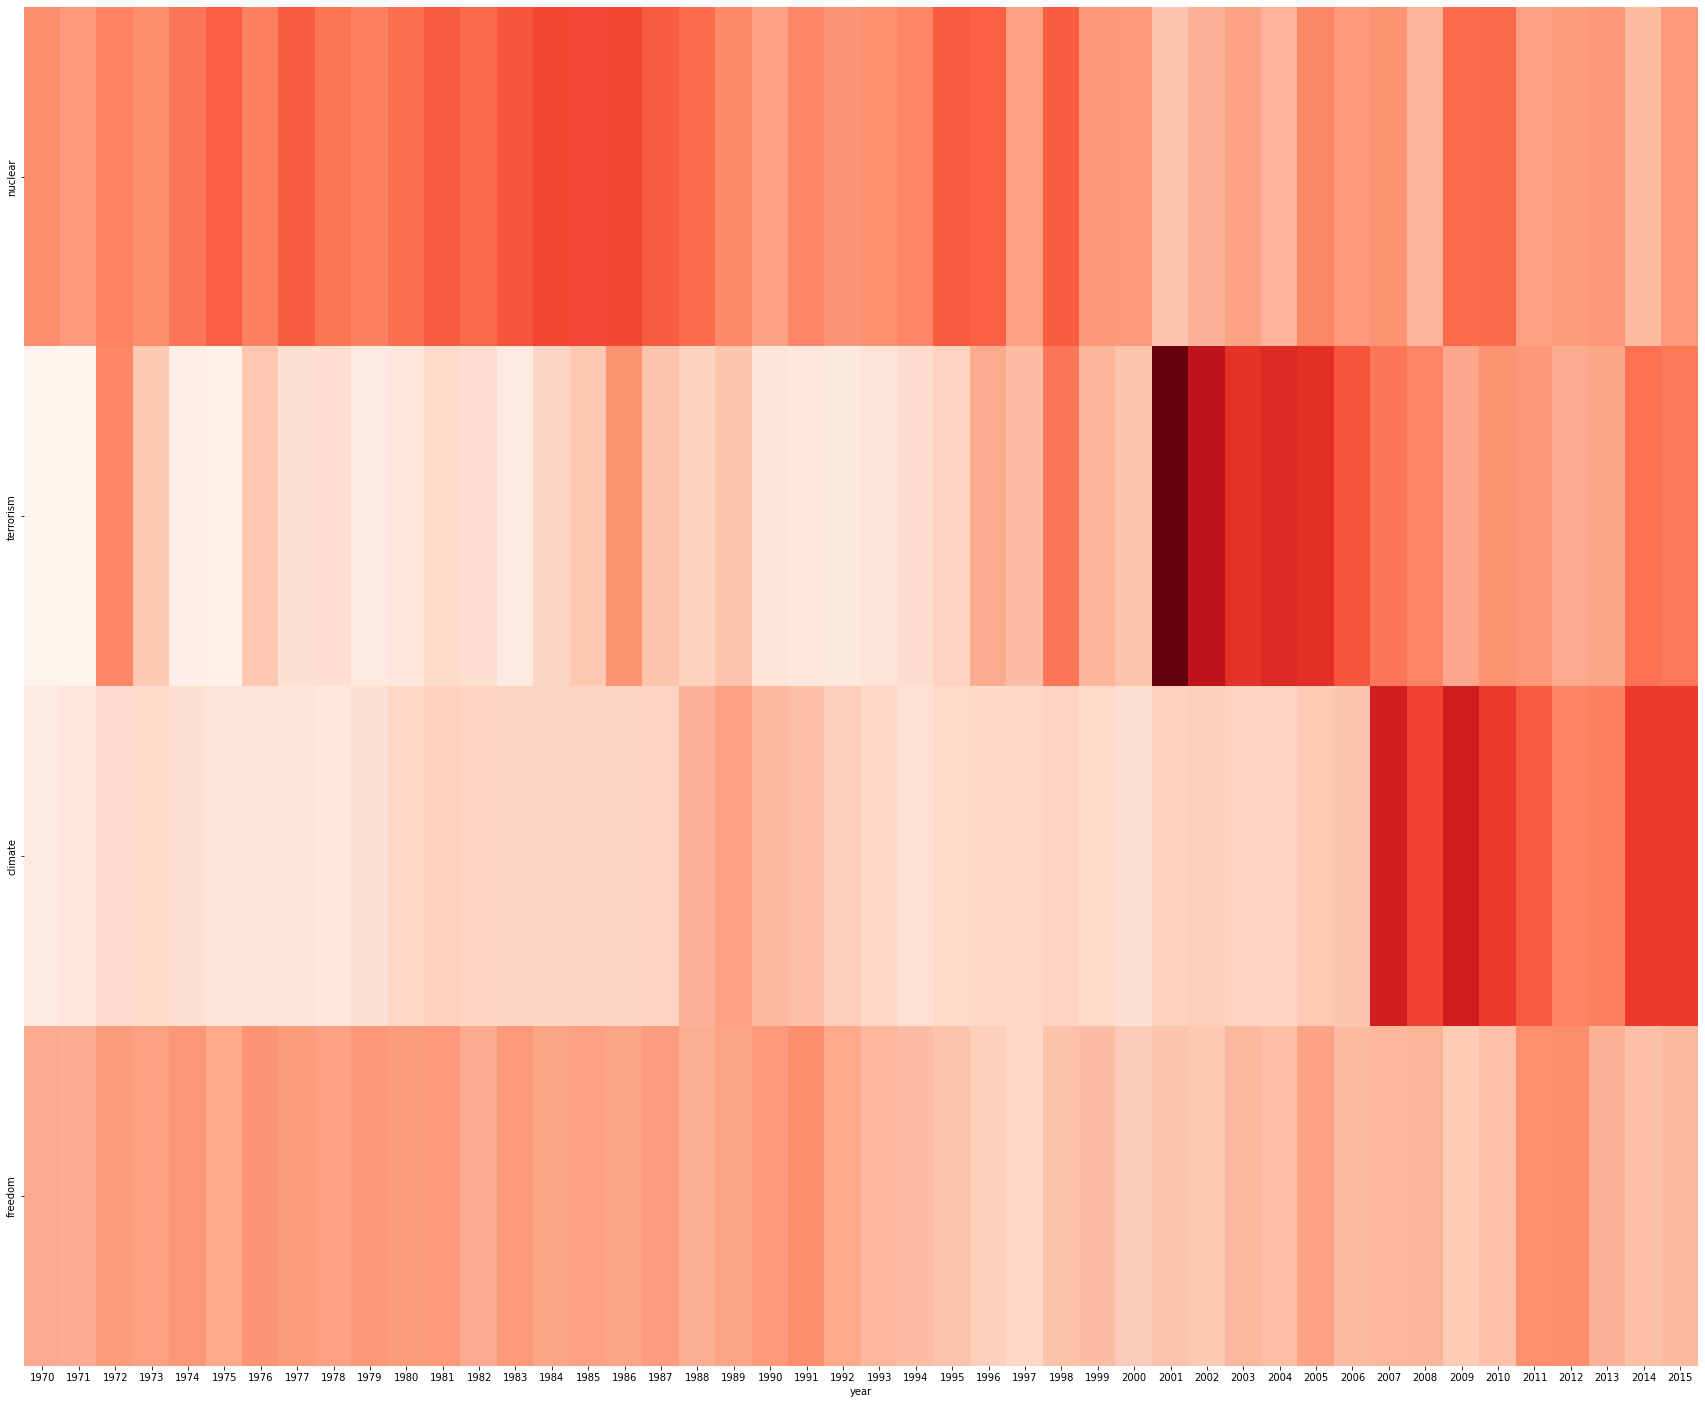

In [25]:
plt.figure(figsize=(30, 25))
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
plt.show()